## Analysis of google reviews

In [2]:
import pandas as pd
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator


In [43]:
filtered_df = pd.read_csv("../raw_data/merged_df.csv")

/home/jamie/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6,7,10,11,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## NLP preproc

In [44]:
def clean(text, list_form=False):
    """clean's text for NLP. If list_form set to False returns string otherwise returns list, by default set to False"""
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    #unaccented_string = unidecode.unidecode(lowercased) # remove accents
    
    tokenized = word_tokenize(lowercased) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    if list_form == True:
        return without_stopwords
    else:
        return " ".join(without_stopwords)

In [45]:
filtered_df['clean_comment'] = filtered_df['comment_comments'].apply(clean)

In [46]:
filtered_df.shape

(81536, 22)

In [47]:
filtered_df.head(1)

,Unnamed: 0,restaurant_name,comment_ratings,when_written_days_ago,comment_comments,translated_,restaurant_type,description,review_count,price,...,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood,clean_comment
0,0,Augusto Lisboa,5.0,14,Well worth the small wait to get in of around ...,0,brunch,"Hip brunch eatery serving savory toasts, banan...",1032.0,2.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,well worth small wait get around mins well loo...


## LIME

In [48]:
filtered_df['good_bad_review'] = filtered_df.comment_ratings.map(lambda x: 1 if x >=4.0 else 0)

In [50]:
filtered_df.head(1)

,Unnamed: 0,restaurant_name,comment_ratings,when_written_days_ago,comment_comments,translated_,restaurant_type,description,review_count,price,...,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood,clean_comment,good_bad_review
0,0,Augusto Lisboa,5.0,14,Well worth the small wait to get in of around ...,0,brunch,"Hip brunch eatery serving savory toasts, banan...",1032.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça,well worth small wait get around mins well loo...,1


In [51]:
filtered_df = filtered_df[['clean_comment', 'good_bad_review']]

KeyError: ('clean_comment', 'good_bad_review')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train["pp_text"], train["target"])

# create bag-of-words with weights using tfid vectoriser
# strip accents and remove stop words during vectorisation
tf=TfidfVectorizer(strip_accents = 'ascii', stop_words='english')

# transform and fit the training set with vectoriser
X_train_tf = tf.fit_transform(X_train)
# transform the test set with vectoriser
X_test_tf = tf.transform(X_test)

# create logistic regression model
logreg = LogisticRegression(verbose=1, random_state=0, penalty='l2', solver='newton-cg')
# train model on  vectorised training data
model = logreg.fit(X_train_tf, y_train)
# evaluate model performance on the test set
pred = model.predict(X_test_tf)
#metrics.f1_score(y_test, pred, average='weighted')

## Tfidf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english')) # Make stopword list

# Tuned TFidfvectorizer
def Tfidf_fit(series):
    vec = TfidfVectorizer(ngram_range = (2,2), min_df=0.1, max_df=0.9).fit(series)
    return vec

def transform_create_list(series):
    vectors = Tfidf_fit(series).transform(series) # Transform text to vectors

    sum_tfidf = vectors.sum(axis=0) # Sum of tfidf weighting by word

    tfidf_list = [(word, sum_tfidf[0, idx]) for word, idx in     Tfidf_fit(series).vocabulary_.items()]  # Get the word and associated weight

    sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)  # Sort

    return sorted_tfidf_list[:10]

In [24]:
Tfidf_fit(filtered_df.clean_comment)
transform_create_list(filtered_df.clean_comment)

[('traduzido pelo', 6742.263158614374), ('pelo google', 6742.263158614374)]

### further processing

In [25]:
text = " ".join(review for review in filtered_df.comment_comments.astype(str))

In [26]:
token_list = clean(text, list_form=True) 

In [ ]:
!pip install wordcloud

In [28]:
 from collections import Counter
import matplotlib.pyplot as plt
import wordcloud

plt.rcParams["figure.figsize"] = [16, 9]

def create_ngrams(token_list, nb_elements):
    """
    Create n-grams for list of tokens. Parameters: token_list : list of strings, nb_elements : number of elements in the n-gram
    Returns: Generator, generator of all n-grams
    """
    ngrams = zip(*[token_list[index_token:] for index_token in range(nb_elements)])
    return (" ".join(ngram) for ngram in ngrams)


def frequent_words(list_words, ngrams_number=1, number_top_words=10):
    """
    Create n-grams for list of tokens. Parameters: ngrams_number : int, number_top_words : int, output dataframe length
    Returns. DataFrame, Dataframe with the entities and their frequencies.
    """
    frequent = []
    if ngrams_number == 1:
        pass
    elif ngrams_number >= 2:
        list_words = create_ngrams(list_words, ngrams_number)
    else:
        raise ValueError("number of n-grams should be >= 1")
    counter = Counter(list_words)
    frequent = counter.most_common(number_top_words)
    return frequent


def make_word_cloud(text_or_counter, stop_words=None):
    if isinstance(text_or_counter, str):
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate(text_or_counter)
    else:
        if stop_words is not None:
            text_or_counter = Counter(word for word in text_or_counter if word not in stop_words)
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate_from_frequencies(text_or_counter)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()


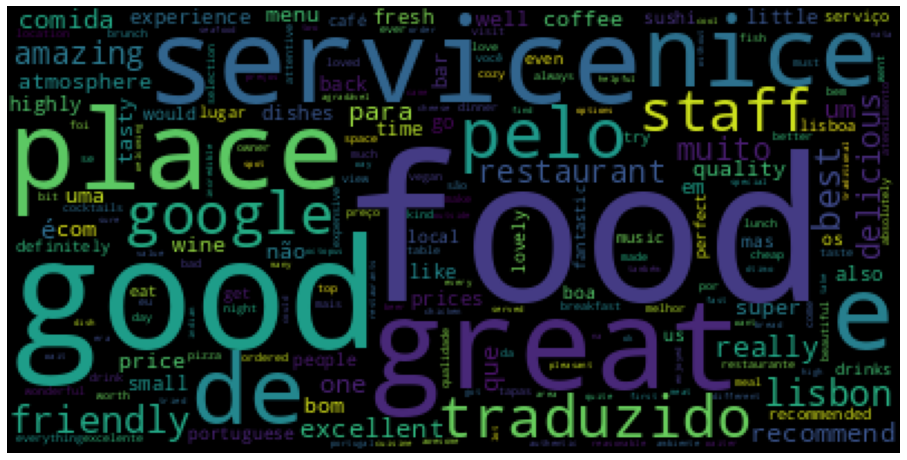

In [29]:
make_word_cloud(token_list, stop_words=stop_words)

In [30]:
frequent_words(token_list, ngrams_number=1, number_top_words=15)

[('food', 25048),
 ('good', 22295),
 ('great', 16451),
 ('service', 14530),
 ('place', 14226),
 ('e', 13362),
 ('nice', 11133),
 ('de', 10581),
 ('pelo', 9826),
 ('google', 9748),
 ('traduzido', 9536),
 ('staff', 9404),
 ('friendly', 8600),
 ('best', 7676),
 ('lisbon', 7285)]

In [31]:
frequent_words(token_list, ngrams_number=2, number_top_words=15)

[('traduzido pelo', 9535),
 ('pelo google', 9535),
 ('good food', 2573),
 ('friendly staff', 2207),
 ('food good', 2048),
 ('great food', 1955),
 ('good service', 1633),
 ('food great', 1496),
 ('great service', 1476),
 ('delicious food', 1322),
 ('nice place', 1317),
 ('one best', 1296),
 ('highly recommend', 1230),
 ('great place', 1148),
 ('muito bom', 1146)]

In [32]:
frequent_words(token_list, ngrams_number=3, number_top_words=15)

[('traduzido pelo google', 9535),
 ('pelo google comida', 570),
 ('pastel de nata', 431),
 ('pelo google um', 423),
 ('pelo google excelente', 421),
 ('pelo google lugar', 406),
 ('pelo google muito', 406),
 ('food great service', 346),
 ('good food good', 332),
 ('food good service', 320),
 ('café da manhã', 315),
 ('great food great', 281),
 ('good value money', 257),
 ('pelo google melhor', 257),
 ('food friendly staff', 253)]